# Sample : MNISTの学習

In [1]:
!pip install --upgrade pip
!pip install pillow

     |████████████████████████████████| 1.5MB 4.8MB/s eta 0:00:01
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
print('tensorflow ver.', tf.__version__)

tensorflow ver. 2.1.0


MNISTの訓練データとテストデータのダウンロード

|　|  |
|--|--|
|画像サイズ|28x28|
|データ範囲|0-255 (uint8)
|データ数|訓練データ 6000枚
|　　　　|テストデータ 6000枚

In [46]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [47]:
print('クラス      ：', type(x_train))
print('データサイズ：', x_train.shape)
print('データ型　　：', x_train.dtype)
print('データ範囲　：', x_train.min(), '-', x_train.max())
print('ラベル範囲　：', y_train.min(), '-', y_train.max())
u, count = np.unique(y_train, return_counts=True)
print('データラベル：', u)
print('ラベル頻度　：', count)

クラス      ： <class 'numpy.ndarray'>
データサイズ： (60000, 28, 28)
データ型　　： uint8
データ範囲　： 0 - 255
ラベル範囲　： 0 - 9
データラベル： [0 1 2 3 4 5 6 7 8 9]
ラベル頻度　： [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


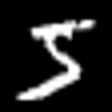

In [48]:
Image.fromarray(x_train[0]).resize((112,112))

データを0-1で正規化する

In [49]:
print(x_train.shape)

(60000, 28, 28)


In [50]:
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train, x_valid = np.split(x_train, [55000])
y_train, y_valid = np.split(y_train, [55000])

In [51]:
print(x_valid.shape)
print(x_train.shape)

(5000, 28, 28)
(55000, 28, 28)


# モデルの構築

- Flatten : 一次元配列に変換
- Dense：全結合層、活性化関数を指定
- Dropout: dropout率を指定。訓練の間に要素の20%のニューロンがランダムにドロップアウトされることを表す。

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
], name='tf_tutorial_model')

model.summary()

Model: "tf_tutorial_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


NNの学習の目的は、損失関数の値を最小化するパラメータを見つけるいわば最適化の一種です。なので、最適パラメータを探索するためのアルゴリズムや損失関数、評価関数を指定してあげる必要があります。

- `optimizer` : 最適化アルゴリズムの指定
- `loss` :  損失関数の指定（一般的に、二乗和誤差や交差エントロピー誤差など）

| | |
|:--|:--|
|2乗和誤差|$ E = \frac{1}{2}\sum_{k} (y_k-t_k)^2$|
|交差エントロピー誤差|$ E=-\sum_{k}t_k logy_k $

- `metrics` : 評価関数の指定。"accuracy"を選択すると、損失関数や出力テンソルの情報から自動で"categorical_accuracy"などを判断してくれる。[3]

In [9]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# モデルの訓練および評価

- `mode.fit`：モデルの訓練
- `model.evaluate`：モデルの評価

引数の詳細については以下を参照：
- [Sequentialモデル - Keras Documentation](https://keras.io/ja/models/sequential/)

In [73]:
fit = model.fit(x_train, y_train, epochs=5, verbose=1, validation_data=(x_valid, y_valid))

model.evaluate(x_test,  y_test, verbose=2)

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 2s 37us/sample - loss: 0.0200 - accuracy: 0.9929 - val_loss: 0.0836 - val_accuracy: 0.9860
Epoch 2/5
55000/55000 [==============================] - 2s 38us/sample - loss: 0.0204 - accuracy: 0.9928 - val_loss: 0.0713 - val_accuracy: 0.9872
Epoch 3/5
55000/55000 [==============================] - 2s 37us/sample - loss: 0.0187 - accuracy: 0.9936 - val_loss: 0.0975 - val_accuracy: 0.9842
Epoch 4/5
55000/55000 [==============================] - 2s 37us/sample - loss: 0.0170 - accuracy: 0.9939 - val_loss: 0.0844 - val_accuracy: 0.9852
Epoch 5/5
55000/55000 [==============================] - 2s 36us/sample - loss: 0.0194 - accuracy: 0.9935 - val_loss: 0.0799 - val_accuracy: 0.9856
10000/10000 - 0s - loss: 0.1000 - accuracy: 0.9805


[0.1000018868546691, 0.9805]

In [68]:
print(fit.history)

{'loss': [0.022497535760849927, 0.022566522760835837, 0.02147705964120687, 0.019701971736521755, 0.01974553241050612], 'accuracy': [0.9919818, 0.99236363, 0.9924545, 0.9932, 0.9930909], 'val_loss': [0.07096936395724625, 0.06407967706004565, 0.07627705267880046, 0.07839528063566285, 0.07142661568468284], 'val_accuracy': [0.9856, 0.9878, 0.9862, 0.9842, 0.987]}


(0, 0.3)

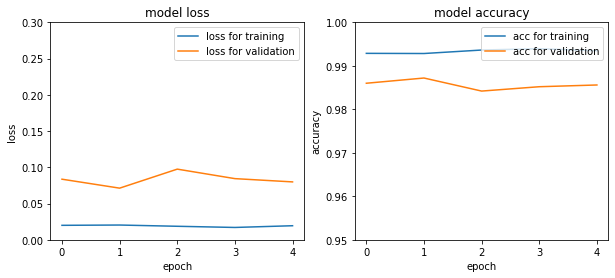

In [79]:
fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))

axR.plot(fit.history['accuracy'],label="acc for training")
axR.plot(fit.history['val_accuracy'],label="acc for validation")
axR.set_title('model accuracy')
axR.set_xlabel('epoch')
axR.set_ylabel('accuracy')
axR.legend(loc='upper right')
plt.axes(axR)
plt.ylim([0.95, 1])

axL.plot(fit.history['loss'],label="loss for training")
axL.plot(fit.history['val_loss'],label="loss for validation")
axL.set_title('model loss')
axL.set_xlabel('epoch')
axL.set_ylabel('loss')
axL.legend(loc='upper right')
plt.axes(axL)
plt.ylim([0, 0.3])



# 参考サイト

1. [初心者のための TensorFlow 2.0 入門  |  TensorFlow Core](https://www.tensorflow.org/tutorials/quickstart/beginner?hl=ja)
1. [TensorFlow, Kerasの基本的な使い方（モデル構築・訓練・評価・予測） | note.nkmk.me](https://note.nkmk.me/python-tensorflow-keras-basics/)
1. [【Keras入門(4)】Kerasの評価関数(Metrics) - Qiita](https://qiita.com/FukuharaYohei/items/f7df70b984a4c7a53d58)
1. [MNISTでハイパーパラメータをいじってloss/accuracyグラフを見てみる - Qiita](https://qiita.com/hiroyuki827/items/213146d551a6e2227810)